# Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import statistics
import math
import itertools

import warnings
from datetime import date, datetime
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")

# Helper Functions

In [2]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.02)
                value = '{:.2f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center", fontsize=13, color='black') 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.0f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left", fontsize=13)

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

# Importando os dados

In [3]:
df_netflix = pd.read_csv('C:/Users/temp/Desktop/data-challenge-20221121-main/data/netflix_titles.csv')
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df_amazon = pd.read_csv('C:/Users/temp/Desktop/data-challenge-20221121-main/data/amazon_prime_titles.csv')
df_amazon.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


# Entendendo os dados

## Shape DF

In [5]:
print('Shape Netflix DF')
print( 'Numero de Linhas: {}'.format( df_netflix.shape[0]))
print( 'Numero de Colunas: {}'.format( df_netflix.shape[1]))

Shape Netflix DF
Numero de Linhas: 8807
Numero de Colunas: 12


In [6]:
print('Shape Amazon Prime DF')
print( 'Numero de Linhas: {}'.format( df_amazon.shape[0]))
print( 'Numero de Colunas: {}'.format( df_amazon.shape[1]))

Shape Amazon Prime DF
Numero de Linhas: 9668
Numero de Colunas: 12


- Ambos os Dataframes possuem 12 colunas, no entanto o Amazon DF possui mais linhas o que Netflix DF

## Missing Values

In [7]:
# Netflix
porcentagem_netflix = np.round(df_netflix.isnull().sum() / df_netflix.shape[0] * 100,2)
porcentagem_netflix

show_id          0.00
type             0.00
title            0.00
director        29.91
cast             9.37
country          9.44
date_added       0.11
release_year     0.00
rating           0.05
duration         0.03
listed_in        0.00
description      0.00
dtype: float64

- Quase 30% dos filmes/séries não possuem informação a respeito do diretor no DF do Netflix. 

In [8]:
# Amazon Prime
porcentagem_amazon = np.round(df_amazon.isnull().sum() / df_amazon.shape[0] * 100,2)
porcentagem_amazon

show_id          0.00
type             0.00
title            0.00
director        21.53
cast            12.75
country         93.05
date_added      98.40
release_year     0.00
rating           3.49
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

- Quase 90% dos conteudos não possuem informação a respeito da data de adição na plataforma no DF de Amazon. 93% dos contéudos não tem informação sobre o país de origem.

## Verificar se há valores duplicados

In [9]:
# Netflix

duplicatas_netflix = df_netflix.duplicated()
linhas_duplicadas_netflix = df_netflix[duplicatas_netflix]
print(linhas_duplicadas_netflix)

Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description]
Index: []


In [10]:
# Netflix

duplicatas_amazon = df_amazon.duplicated()
linhas_duplicadas_amazon = df_amazon[duplicatas_amazon]
print(linhas_duplicadas_amazon)

Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description]
Index: []


- Não existem observações duplicadas em ambos dataframes

## Verificar se há conteúdos presente em ambos DF

In [11]:
df_amazon.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...


In [12]:
df_netflix.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


In [13]:
array_title_netflix = df_netflix.title.unique()
array_title_amazon = df_amazon.title.unique()


In [14]:
title_comuns = list(set(array_title_netflix) & set(array_title_amazon))

print('5 títlos em comum: \n',title_comuns[:5])
print('\n')
print(f'No total temos {len(title_comuns)} títulos em comum em ambos os DF')

5 títlos em comum: 
 ['Truth or Dare', 'Flash of Genius', 'Burning', 'Paranoia', '21']


No total temos 389 títulos em comum em ambos os DF


# Feature Engineering

In [19]:
array_df = [df_netflix, df_amazon]

In [20]:
for df in array_df:
    df["date_added"] = pd.to_datetime(df['date_added'])
    df['month_added']=df['date_added'].dt.month
    df['year_added'] = df['date_added'].dt.year

In [21]:
#Atribuir o nome do mês na base de dados
dmap_mes = {1:'JAN',2:'FEV',3:'MAR',4:'ABR',5:'MAI',6:'JUN',7:'JUL',8:'AGO',9:'SET',10:'OUT',11:'NOV',12:'DEZ'}

for df in array_df:
    df['month_added'] = df['month_added'].map(dmap_mes)

In [22]:
df_netflix['plataform'] = 'Netflix'
df_amazon['plataform'] = 'Amazon_Prime'

## Mesclando Ambos os DF

In [23]:
# concatenando os dataframes
df_final = pd.concat([df_netflix, df_amazon], join='inner', ignore_index=True)
df_final.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,plataform
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",SET,2021.0,Netflix
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",SET,2021.0,Netflix
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,SET,2021.0,Netflix


In [25]:
df_final.shape

(18475, 15)

- Criou-se uma nova coluna em ambos os dataframes para indicar a plataforma dos conteudos. Verificou-se que há 389 conteúdos em ambos os dataframes. O código abaixo é para remover os títulos duplicados e daremos preferência para o título que tiver o maior número de colunas não nulas.

In [26]:
df_netflix.query('title == "Rainbow Ruby"')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,plataform
3084,s3085,TV Show,Rainbow Ruby,NaN,"Alyssya Swales, Shannon Chan-Kent, Brian Drumm...","South Korea, Canada, United States, China",2019-12-31,2016,TV-Y,1 Season,Kids' TV,Ruby makes magical journeys with her teddy bea...,DEZ,2019.0,Netflix


In [27]:
df_amazon.query('title == "Rainbow Ruby"')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,plataform
1217,s1218,TV Show,Rainbow Ruby,NaN,NaN,NaN,NaT,2016,TV-Y,1 Season,"Animation, Kids",Rainbow Ruby comes to the rescue whenever a do...,NaN,NaN,Amazon_Prime


- Nas células acima, filtramos o titulo "Rainbow Ruby" em ambos os DF, nesse caso, queremos manter esse título quando ele aparece no DF do Netflix, pois ele possui mais info nesse DF.

In [28]:
df_final = df_final.sort_values(
    by=['director', 'cast', 'country', 'date_added',
        'release_year', 'rating', 'duration', 'listed_in',
        'description'], na_position='last').drop_duplicates(subset=['title'], keep='first')


In [29]:
df_final.query('title == "Rainbow Ruby"')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,plataform
3084,s3085,TV Show,Rainbow Ruby,NaN,"Alyssya Swales, Shannon Chan-Kent, Brian Drumm...","South Korea, Canada, United States, China",2019-12-31,2016,TV-Y,1 Season,Kids' TV,Ruby makes magical journeys with her teddy bea...,DEZ,2019.0,Netflix


- Na célula acima, percebemos que atingimos o objetivo. Mantemos o titulo "Rainbow Ruby" com origem no netflix.

# EDA

## Top 10 Atores/Atrizes

In [30]:
df_final.cast.values

array(['1', '1', '1', ..., nan, nan, nan], dtype=object)

In [31]:
df_final.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,plataform
15946,s7140,Movie,Clip: 1,1,1,NaN,NaT,2021,18+,3 min,Action,clip1,NaN,NaN,Amazon_Prime
15737,s6931,Movie,Title Post onboarding 8,1,1,NaN,NaT,2021,18+,61 min,Action,Title Post onboarding 8,NaN,NaN,Amazon_Prime
16065,s7259,Movie,Clip: ACT 4 - Title after removing 1C - 4,1,1,NaN,NaT,2021,7+,61 min,Comedy,ACT 4 - Title after removing 1C - 44,NaN,NaN,Amazon_Prime
15934,s7128,Movie,Act 4 - Title before 1C onboarding 2,1,1,NaN,NaT,2021,ALL,61 min,Action,1,NaN,NaN,Amazon_Prime
15935,s7129,Movie,Act 4 - Title before 1C onboarding 1,1,1,NaN,NaT,2021,ALL,61 min,Action,1,NaN,NaN,Amazon_Prime


In [32]:
df_final.query('title == "Rainbow Ruby"')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,plataform
3084,s3085,TV Show,Rainbow Ruby,NaN,"Alyssya Swales, Shannon Chan-Kent, Brian Drumm...","South Korea, Canada, United States, China",2019-12-31,2016,TV-Y,1 Season,Kids' TV,Ruby makes magical journeys with her teddy bea...,DEZ,2019.0,Netflix


In [33]:
df_netflix.cast.values

array([nan,
       'Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng',
       'Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera',
       ...,
       'Jesse Eisenberg, Woody Harrelson, Emma Stone, Abigail Breslin, Amber Heard, Bill Murray, Derek Graf',
       'Tim Allen, Courteney Cox, Chevy Chase, Kate Mara, Ryan Newman, Michael Cassidy, Spencer Breslin, Rip Torn, Kevin Zegers',
       'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy'],
      dtype=object)

In [34]:
df_final_aux = df_final.copy()

In [35]:
df_final_aux['cast'] = df_final_aux['cast'].astype(str)

In [36]:
nomes = df_final_aux['cast'].str.split(', ')

# criar um dicionário para contar a frequência de cada nome
freq = {}
for lista in nomes:
    for nome in lista:
        if nome in freq:
            freq[nome] += 1
        else:
            freq[nome] = 1

# criar um dataframe com a contagem de cada nome
df_freq = pd.DataFrame({'nome': list(freq.keys()), 'frequencia': list(freq.values())})

# ordenar o dataframe pela frequência em ordem decrescente
df_freq = df_freq.sort_values('frequencia', ascending=False)

remover_nomes = ['nan', '1']

df_freq = df_freq[~df_freq.nome.isin(remover_nomes)]

df_freq.head(10)

,nome,frequencia
55255,Maggie Binkley,56
530,Anupam Kher,56
3159,Amitabh Bachchan,44
117,Nassar,43
1049,Shah Rukh Khan,40
394,Akshay Kumar,39
397,Paresh Rawal,39
572,Naseeruddin Shah,38
2504,Danny Trejo,37
3306,Om Puri,34


In [37]:
df_freq.head(20)

,nome,frequencia
55255,Maggie Binkley,56
530,Anupam Kher,56
3159,Amitabh Bachchan,44
117,Nassar,43
1049,Shah Rukh Khan,40
394,Akshay Kumar,39
397,Paresh Rawal,39
572,Naseeruddin Shah,38
2504,Danny Trejo,37
3306,Om Puri,34


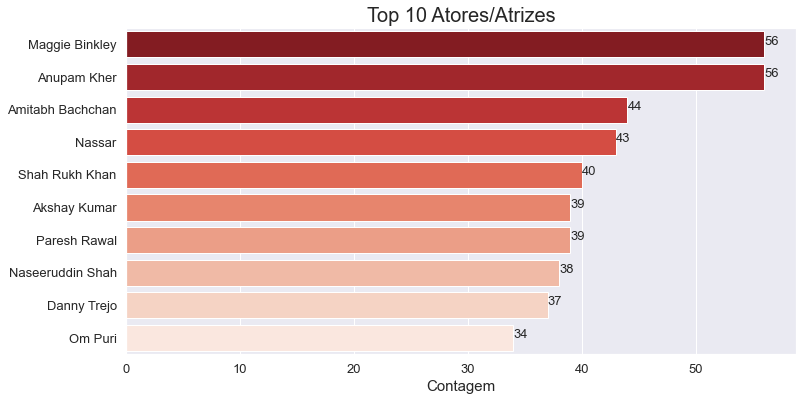

In [38]:
plt.figure(figsize=(12,6))


g = sns.barplot(x='frequencia', y='nome', data=df_freq.iloc[0:10,], palette='Reds_r')
plt.title('Top 10 Atores/Atrizes', fontsize=20)
plt.ylabel('', fontsize=15)
plt.xlabel('Contagem', fontsize=15)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
show_values(g,'h')


## Top 5 países produtores de conteúdos considerando

### Geral

In [39]:
df_final.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,plataform
12352,s3546,Movie,15-Minute Cardio Flow 7.0 Workout (with weights),NaN,Maggie Binkley,NaN,NaT,2019,ALL,19 min,Fitness,Just what you need after a week of hard work- ...,NaN,NaN,Amazon_Prime
17073,s8267,Movie,She's Out of My League,Jim Field Smith,"Jay Baruchel, Alice Eve, T.J. Miller, Mike Vog...",United States,NaT,2010,R,105 min,"Comedy, Romance","In this outrageous comedy, Kirk (Jay Baruchel,...",NaN,NaN,Amazon_Prime
15500,s6694,Movie,Burning Plain,Guillermo Arriaga,"Charlize Theron, Kim Basinger, Jennifer Lawren...",NaN,NaT,2009,R,107 min,"Arthouse, Drama, Suspense",From writer/director Guillermo Arriaga comes T...,NaN,NaN,Amazon_Prime
10763,s1957,Movie,Kentucky Fried Movie,John Landis,"Marilyn Joi, Saul Kahan, David Zucker, Marcy G...",NaN,NaT,1977,18+,83 min,Comedy,Directed by the legendary John Landis (Animal ...,NaN,NaN,Amazon_Prime
14231,s5425,Movie,For My Daughter's Honor,Alan Metzger,"Gary Cole, Nicholle Tom, Mac Davis, Mary Kay P...",NaN,NaT,1996,13+,88 min,Drama,"Amy Dustin, a fourteen-year-old high school st...",NaN,NaN,Amazon_Prime


In [40]:
df_final.country.value_counts()

United States                                   2990
India                                           1176
United Kingdom                                   427
Japan                                            245
South Korea                                      194
                                                ... 
Singapore, France                                  1
Luxembourg                                         1
Japan, Canada                                      1
United States, United Kingdom, Canada, China       1
Philippines, Qatar                                 1
Name: country, Length: 770, dtype: int64

In [41]:
paises = df_final_aux['country'].str.split(', ').dropna()

# criar um dicionário para contar a frequência de cada nome
freq = {}
for lista in paises:
    for nome in lista:
        if nome in freq:
            freq[nome] += 1
        else:
            freq[nome] = 1

# criar um dataframe com a contagem de cada nome
df_freq = pd.DataFrame({'pais': list(freq.keys()), 'frequencia': list(freq.values())})

# ordenar o dataframe pela frequência em ordem decrescente
df_freq = df_freq.sort_values('frequencia', ascending=False)


df_freq.head(10)

,pais,frequencia
2,United States,3906
0,India,1264
5,United Kingdom,837
3,Canada,460
9,France,401
6,Japan,321
11,Spain,240
29,Germany,239
7,South Korea,224
18,Mexico,170


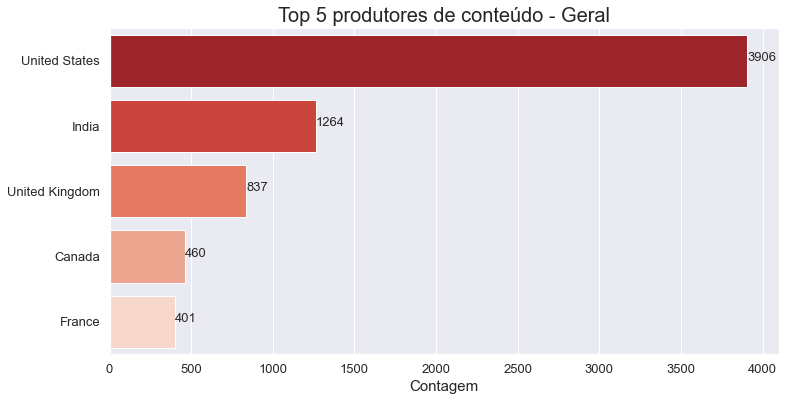

In [42]:
plt.figure(figsize=(12,6))


g = sns.barplot(x='frequencia', y='pais', data=df_freq.iloc[0:5,], palette='Reds_r')
plt.title('Top 5 produtores de conteúdo - Geral', fontsize=20)
plt.ylabel('', fontsize=15)
plt.xlabel('Contagem', fontsize=15)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
show_values(g,'h')


### Netflix

In [43]:
paises = df_netflix['country'].str.split(', ').dropna()

# criar um dicionário para contar a frequência de cada nome
freq = {}
for lista in paises:
    for nome in lista:
        if nome in freq:
            freq[nome] += 1
        else:
            freq[nome] = 1

# criar um dataframe com a contagem de cada nome
df_freq = pd.DataFrame({'pais': list(freq.keys()), 'frequencia': list(freq.values())})

# ordenar o dataframe pela frequência em ordem decrescente
df_freq = df_freq.sort_values('frequencia', ascending=False)


df_freq.head(10)

,pais,frequencia
0,United States,3689
2,India,1046
5,United Kingdom,804
15,Canada,445
12,France,393
16,Japan,318
18,Spain,232
20,South Korea,231
6,Germany,226
9,Mexico,169


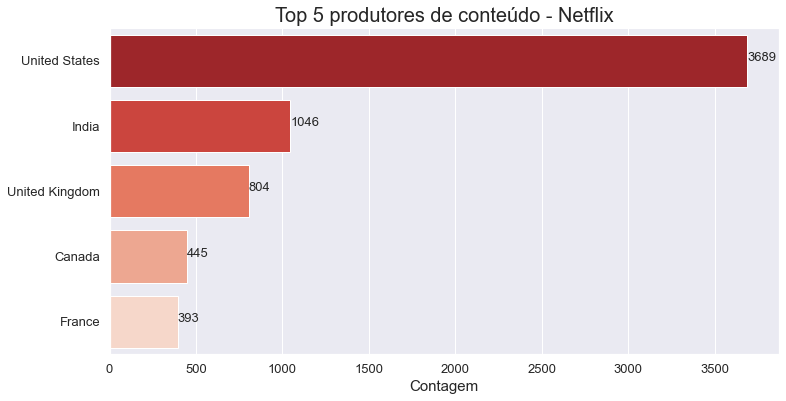

In [44]:
plt.figure(figsize=(12,6))


g = sns.barplot(x='frequencia', y='pais', data=df_freq.iloc[0:5,], palette='Reds_r')
plt.title('Top 5 produtores de conteúdo - Netflix', fontsize=20)
plt.ylabel('', fontsize=15)
plt.xlabel('Contagem', fontsize=15)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
show_values(g,'h')


### Amazon Prime

In [45]:
df_amazon.country.value_counts()

United States                                253
India                                        229
United Kingdom                                28
Canada                                        16
United Kingdom, United States                 12
                                            ... 
Japan, France                                  1
United States, United Kingdom, Kazakhstan      1
United States, France, Denmark                 1
United States, Japan                           1
Iran, France                                   1
Name: country, Length: 86, dtype: int64

In [46]:
paises = df_amazon['country'].str.split(', ').dropna()

# criar um dicionário para contar a frequência de cada nome
freq = {}
for lista in paises:
    for nome in lista:
        if nome in freq:
            freq[nome] += 1
        else:
            freq[nome] = 1

# criar um dataframe com a contagem de cada nome
df_freq = pd.DataFrame({'pais': list(freq.keys()), 'frequencia': list(freq.values())})

# ordenar o dataframe pela frequência em ordem decrescente
df_freq = df_freq.sort_values('frequencia', ascending=False)


df_freq.head(10)

,pais,frequencia
2,United States,334
1,India,246
3,United Kingdom,67
0,Canada,35
4,France,20
7,Germany,17
6,Italy,14
5,Spain,11
10,Denmark,6
8,Japan,6


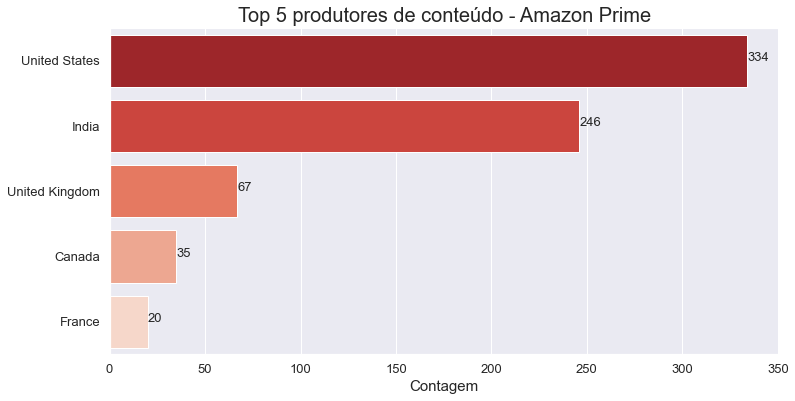

In [47]:
plt.figure(figsize=(12,6))


g = sns.barplot(x='frequencia', y='pais', data=df_freq.iloc[0:5,], palette='Reds_r')
plt.title('Top 5 produtores de conteúdo - Amazon Prime', fontsize=20)
plt.ylabel('', fontsize=15)
plt.xlabel('Contagem', fontsize=15)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
show_values(g,'h')


- Não houve alteração no Top 5 países produtos de conteúdo nos gráficos Geral, Netflix e Amazon Prime

## Mês no qual há mais adições de filmes na plataforma Netflix

- Só serão considerados os Filmes (Movies).

In [48]:
df_netflix_aux = df_netflix[~df_netflix.date_added.isnull()]

In [49]:
df_netflix_aux['year_added'] = df_netflix_aux['year_added'].astype(int)
df_netflix_aux['constant'] = 1

df_netflix_aux.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,plataform,constant
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",SET,2021,Netflix,1


In [50]:
df_netflix_movies = df_netflix_aux.query('type == "Movie"')

In [51]:
tb_pivot = df_netflix_movies.groupby(['month_added','year_added'], as_index=False).agg({'constant':'sum'})
tb_pivot.head()

,month_added,year_added,constant
0,ABR,2014,1
1,ABR,2015,1
2,ABR,2016,14
3,ABR,2017,66
4,ABR,2018,87


In [52]:
mapa_adicao = tb_pivot.pivot(index='year_added',columns='month_added',values='constant')

ordem_columns = ['JAN', 'FEV', 'MAR', 'ABR', 'MAI', 'JUN', 'JUL', 'AGO', 'SET', 'OUT', 'NOV','DEZ']
mapa_adicao = mapa_adicao.reindex(columns=ordem_columns)
mapa_adicao.fillna(0, inplace = True)
mapa_adicao

month_added,JAN,FEV,MAR,ABR,MAI,JUN,JUL,AGO,SET,OUT,NOV,DEZ
year_added,,,,,,,,,,,,
2008,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2011,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,11.0,0.0,0.0
2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0
2014,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,4.0,2.0,5.0
2015,1.0,3.0,3.0,1.0,5.0,4.0,5.0,2.0,6.0,10.0,2.0,14.0
2016,15.0,9.0,14.0,14.0,9.0,11.0,19.0,23.0,29.0,32.0,26.0,52.0


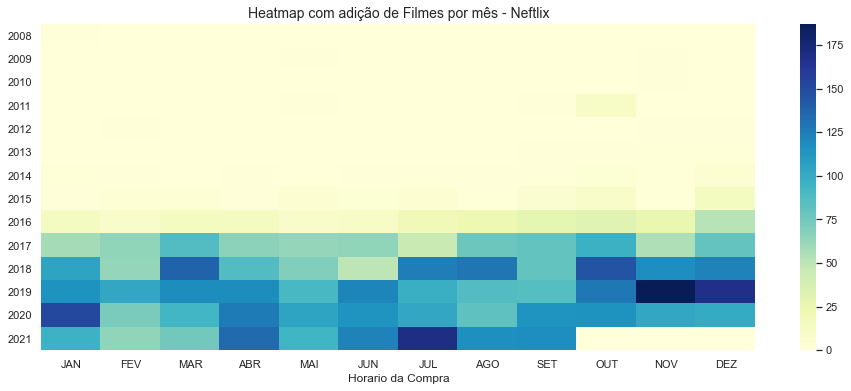

In [53]:
plt.figure(figsize=(16,6))
sns.heatmap(mapa_adicao,cmap='YlGnBu')

plt.yticks(rotation=0)
plt.ylabel('')
plt.xlabel('Horario da Compra')

plt.title(f'Heatmap com adição de Filmes por mês - Neftlix',size=14);

- Os períodos com mais adição de conteúdos foram: Nov/2019 e Jul/2021

In [54]:
adicao_mes = df_netflix_movies.groupby('month_added', as_index=False).agg({'constant':'sum'})
adicao_mes

,month_added,constant
0,ABR,550
1,AGO,519
2,DEZ,547
3,FEV,382
4,JAN,546
5,JUL,565
6,JUN,492
7,MAI,439
8,MAR,529
9,NOV,498


In [55]:
ordem_columns = ['JAN', 'FEV', 'MAR', 'ABR', 'MAI', 'JUN', 'JUL', 'AGO', 'SET', 'OUT', 'NOV','DEZ']

In [56]:
# transformar a coluna em uma categoria com a ordem desejada
adicao_mes['ordem_mes'] = pd.Categorical(adicao_mes['month_added'], categories=ordem_columns, ordered=True)

# ordenar o DataFrame pela coluna2
df_ordenado = adicao_mes.sort_values('ordem_mes')
df_ordenado.drop('month_added', axis = 1, inplace = True)

df_ordenado.reset_index(drop = True, inplace = True)

df_ordenado['porcentagem'] = np.round((df_ordenado['constant'] / \
                                       df_ordenado['constant'].sum())*100,2)


df_ordenado

,constant,ordem_mes,porcentagem
0,546,JAN,8.91
1,382,FEV,6.23
2,529,MAR,8.63
3,550,ABR,8.97
4,439,MAI,7.16
5,492,JUN,8.02
6,565,JUL,9.22
7,519,AGO,8.47
8,519,SET,8.47
9,545,OUT,8.89


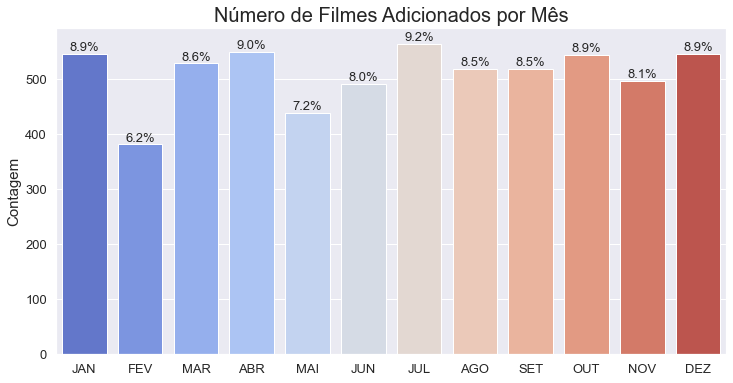

In [57]:
plt.figure(figsize=(12,6))


ax = sns.barplot(x='ordem_mes', y='constant', data=df_ordenado, palette='coolwarm')
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+5
   ax.annotate('{:.1f}%'.format(df_ordenado.porcentagem[i]), (x, y), ha='center', fontsize=13)

plt.title('Número de Filmes Adicionados por Mês', fontsize=20)
plt.ylabel('Contagem', fontsize=15)
plt.xlabel('', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()


- No geral, os meses com mais adições de conteúdo foram Julho, Abril e Dezembro.

## Quantidade de filmes listados como comédia

- Só serão considerados filmes(movies).

In [58]:
df_final.type.value_counts()

Movie      13685
TV Show     4401
Name: type, dtype: int64

In [59]:
df_final_movies = df_final.query('type == "Movie"')
df_final_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,plataform
15946,s7140,Movie,Clip: 1,1,1,NaN,NaT,2021,18+,3 min,Action,clip1,NaN,NaN,Amazon_Prime
15737,s6931,Movie,Title Post onboarding 8,1,1,NaN,NaT,2021,18+,61 min,Action,Title Post onboarding 8,NaN,NaN,Amazon_Prime
16065,s7259,Movie,Clip: ACT 4 - Title after removing 1C - 4,1,1,NaN,NaT,2021,7+,61 min,Comedy,ACT 4 - Title after removing 1C - 44,NaN,NaN,Amazon_Prime
15934,s7128,Movie,Act 4 - Title before 1C onboarding 2,1,1,NaN,NaT,2021,ALL,61 min,Action,1,NaN,NaN,Amazon_Prime
15935,s7129,Movie,Act 4 - Title before 1C onboarding 1,1,1,NaN,NaT,2021,ALL,61 min,Action,1,NaN,NaN,Amazon_Prime


In [60]:
df_final_movies.listed_in.value_counts()

Drama                                                858
Comedy                                               437
Dramas, International Movies                         359
Documentaries                                        357
Drama, Suspense                                      343
                                                    ... 
Arthouse, Young Adult Audience                         1
LGBTQ, Special Interest                                1
Anime Features, Music & Musicals                       1
Arts, Entertainment, and Culture, Fantasy, Horror      1
Arthouse, Comedy, International                        1
Name: listed_in, Length: 709, dtype: int64

In [61]:
genero_filmes = df_final_movies['listed_in'].str.split(', ').dropna()

# criar um dicionário para contar a frequência de cada nome
freq = {}
for lista in genero_filmes:
    for nome in lista:
        if nome in freq:
            freq[nome] += 1
        else:
            freq[nome] = 1

# criar um dataframe com a contagem de cada nome
df_freq = pd.DataFrame({'genero': list(freq.keys()), 'frequencia': list(freq.values())})

# ordenar o dataframe pela frequência em ordem decrescente
df_freq = df_freq.sort_values('frequencia', ascending=False)


df_freq.head(10)

,genero,frequencia
6,Drama,3150
10,International Movies,2719
9,Dramas,2368
1,Comedy,1775
8,Comedies,1637
0,Action,1471
16,Suspense,1351
23,Documentaries,864
14,Action & Adventure,839
12,Horror,832


In [62]:
filmes_comedia = df_freq.query('genero == "Comedy"')['frequencia'].values[0]
print(f'{filmes_comedia} filmes estão listados com o gênero de comédia.')

1775 filmes estão listados com o gênero de comédia.


##  Lista de todos os gêneros de filmes

In [63]:
print(f'Temos {df_freq.shape[0]} diferentes tipos de gênero de filmes')

Temos 49 diferentes tipos de gênero de filmes


In [64]:
# Lista de todos os gêneros

df_freq.genero.values

array(['Drama', 'International Movies', 'Dramas', 'Comedy', 'Comedies',
       'Action', 'Suspense', 'Documentaries', 'Action & Adventure',
       'Horror', 'Independent Movies', 'Special Interest', 'Kids',
       'Documentary', 'Children & Family Movies', 'Romantic Movies',
       'Romance', 'Thrillers', 'Arts', 'Entertainment', 'and Culture',
       'Science Fiction', 'Music & Musicals', 'Horror Movies',
       'Stand-Up Comedy', 'Animation', 'International',
       'Sci-Fi & Fantasy', 'Adventure', 'Western', 'Sports Movies',
       'Music Videos and Concerts', 'Arthouse', 'Classic Movies',
       'Sports', 'LGBTQ Movies', 'LGBTQ', 'Fitness', 'Anime Features',
       'Young Adult Audience', 'Cult Movies', 'Faith & Spirituality',
       'Movies', 'Faith and Spirituality', 'Fantasy', 'Military and War',
       'Anime', 'Historical', 'Talk Show and Variety'], dtype=object)

## Tipo de conteudo

In [65]:
df_netflix.type.value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

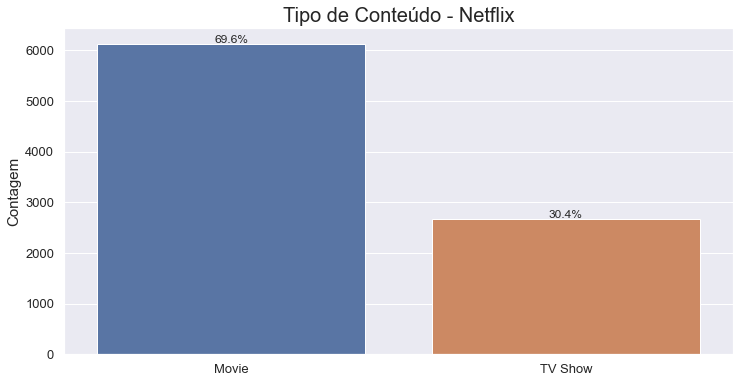

In [66]:
plt.figure(figsize=(12,6))


counts = df_netflix.type.value_counts()

ax = sns.barplot(x=counts.index, y=counts.values)

for i, v in enumerate(counts.values):
    ax.text(i, v + 10, "{:.1f}%".format((v/len(df_netflix))*100), ha='center')

plt.title('Tipo de Conteúdo - Netflix', fontsize=20)
plt.ylabel('Contagem', fontsize=15)
plt.xlabel('', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()



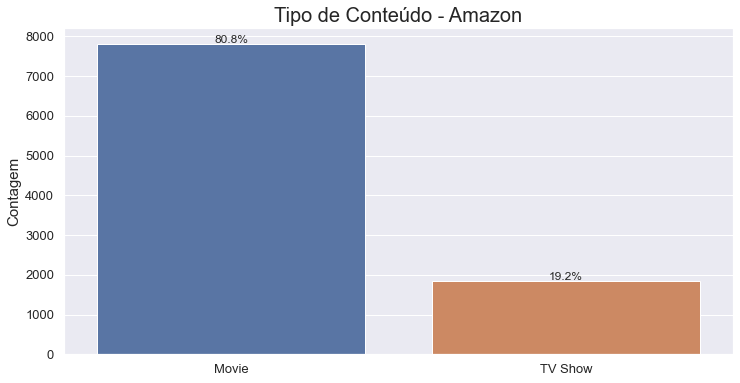

In [67]:
plt.figure(figsize=(12,6))


counts = df_amazon.type.value_counts()

ax = sns.barplot(x=counts.index, y=counts.values)

for i, v in enumerate(counts.values):
    ax.text(i, v + 10, "{:.1f}%".format((v/len(df_amazon))*100), ha='center')

plt.title('Tipo de Conteúdo - Amazon', fontsize=20)
plt.ylabel('Contagem', fontsize=15)
plt.xlabel('', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()



- Quase 70% dos conteudos do Netflix são filmes, enquanto que aproximadamente 81% dos conteudos na Amazon Prime são filmes.

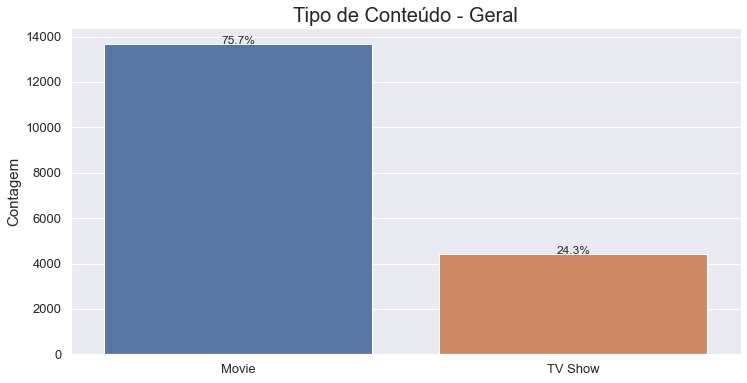

In [68]:
plt.figure(figsize=(12,6))


counts = df_final.type.value_counts()

ax = sns.barplot(x=counts.index, y=counts.values)

for i, v in enumerate(counts.values):
    ax.text(i, v + 10, "{:.1f}%".format((v/len(df_final))*100), ha='center')

plt.title('Tipo de Conteúdo - Geral', fontsize=20)
plt.ylabel('Contagem', fontsize=15)
plt.xlabel('', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

